In [ ]:
import numpy as np
import os
import wave
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 431, 3))


In [11]:
folder_path = ""

In [12]:
# Loop through each subfolder in the folder path
features = []
labels = []

for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    # Loop through each audio file in the subfolder
    for filename in os.listdir(subfolder_path):
        file_path = os.path.join(subfolder_path, filename)
        # Load the audio file and extract features using VGG16
        with wave.open(file_path, 'rb') as wav_file:
            nchannels, sampwidth, framerate, nframes, comptype, compname = wav_file.getparams()
            audio = np.frombuffer(wav_file.readframes(nframes), dtype=np.int16)
        audio_3channel = np.stack([audio]*3, axis=-1)
        audio_resized = np.resize(audio_3channel, (128, 431, 3))
        audio_features = vgg16.predict(preprocess_input(np.expand_dims(audio_resized, axis=0)))
        # Append the features and labels to the arrays
        features.append(audio_features.flatten())
        labels.append(subfolder)

1/1 [==============================] - 0s 195ms/step


In [13]:
# Convert the feature and label arrays to numpy arrays
X = np.array(features)
y = np.array(labels)

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Preprocess the data by scaling the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Train an SVM model on the scaled features
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [17]:

# Evaluate the model on the testing set
score = svm.score(X_test_scaled, y_test)
print('Accuracy:', score)

Accuracy: 0.7133757961783439


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm.predict(X_test)

test_score = accuracy_score(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the evaluation metrics
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 score: ", f1)


Accuracy:  0.1942675159235669
Precision:  0.22680368267662496
Recall:  0.29774891774891776
F1 score:  0.15677181430821008


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


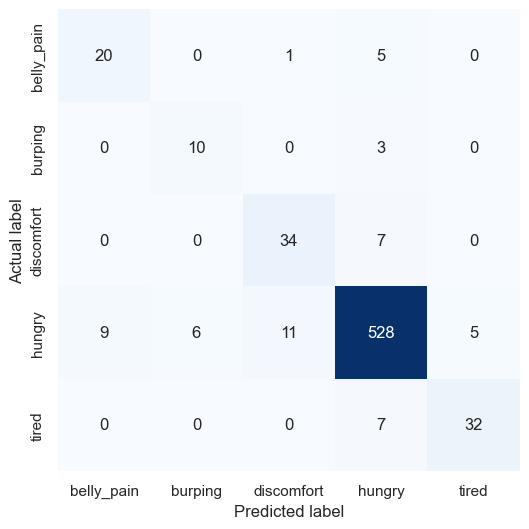

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the model on the testing set
y_predicted = svm.predict(X_test_scaled)
mat = confusion_matrix(y_test, y_predicted)
class_labels = ['belly_pain', 'burping', 'discomfort', 'hungry', 'tired']

# Plot the confusion matrix
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [50]:
audio_file_path = " "
with wave.open(audio_file_path, 'rb') as wav_file:
    nchannels, sampwidth, framerate, nframes, comptype, compname = wav_file.getparams()
    audio = np.frombuffer(wav_file.readframes(nframes), dtype=np.int16)
audio_3channel = np.stack([audio]*3, axis=-1)
audio_resized = np.resize(audio_3channel, (128, 431, 3))
audio_features = vgg16.predict(preprocess_input(np.expand_dims(audio_resized, axis=0)))
audio_features_flat = audio_features.flatten()

# Preprocess the features using the saved scaler
audio_features_scaled = scaler.transform(audio_features_flat.reshape(1, -1))




1/1 [==============================] - 0s 194ms/step


In [51]:
# Make a prediction using the trained SVM model
prediction = svm.predict(audio_features_scaled)
print('The predicted class is:', prediction[0])

The predicted class is: hungry
